In [1]:
import numpy as np
import pandas as pd

In [60]:
train = pd.read_csv('/home/tonne/code/autotonne/data/riiid/train.csv', nrows= 100000)

In [61]:
train.describe(include='all')

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
count,100000.000000,1.000000e+05,1.000000e+05,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,97834.000000,99652
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90349
mean,49999.500000,7.332661e+09,1.090868e+06,5156.21962,0.018180,974.593070,1.382490,0.655080,24715.389854,NaN
std,28867.657797,1.031230e+10,6.657180e+05,3896.63440,0.133603,1205.095836,1.193602,0.512165,17379.027689,NaN
min,0.000000,0.000000e+00,1.150000e+02,0.00000,0.000000,0.000000,-1.000000,-1.000000,0.000000,NaN
25%,24999.750000,6.595929e+08,4.590170e+05,1797.00000,0.000000,124.000000,0.000000,0.000000,16000.000000,NaN
50%,49999.500000,4.015927e+09,1.282581e+06,4980.00000,0.000000,458.000000,1.000000,1.000000,21000.000000,NaN
75%,74999.250000,1.000065e+10,1.567938e+06,7427.00000,0.000000,1358.000000,3.000000,1.000000,28666.000000,NaN


## Missing Value

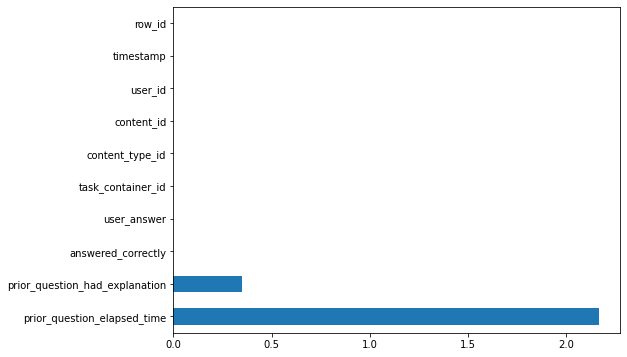

In [62]:
(train.isna().sum()*100/len(train)).sort_values(ascending=False).plot.barh(figsize = (8, 6))

In [63]:
questions = pd.read_csv('/home/tonne/code/autotonne/data/questions.csv')

In [64]:
questions

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38
...,...,...,...,...,...
13518,13518,13518,3,5,14
13519,13519,13519,3,5,8
13520,13520,13520,2,5,73
13521,13521,13521,0,5,125


In [65]:
lectures = pd.read_csv('/home/tonne/code/autotonne/data/riiid/lectures.csv')

In [66]:
lectures

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question
...,...,...,...,...
413,32535,8,5,solving question
414,32570,113,3,solving question
415,32604,24,6,concept
416,32625,142,2,concept


In [67]:
test = pd.read_csv('/home/tonne/code/autotonne/data/riiid/example_test.csv')

In [68]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   row_id                          104 non-null    int64  
 1   group_num                       104 non-null    int64  
 2   timestamp                       104 non-null    int64  
 3   user_id                         104 non-null    int64  
 4   content_id                      104 non-null    int64  
 5   content_type_id                 104 non-null    int64  
 6   task_container_id               104 non-null    int64  
 7   prior_question_elapsed_time     103 non-null    float64
 8   prior_question_had_explanation  103 non-null    object 
 9   prior_group_answers_correct     4 non-null      object 
 10  prior_group_responses           4 non-null      object 
dtypes: float64(1), int64(7), object(3)
memory usage: 9.1+ KB


In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   row_id                          100000 non-null  int64  
 1   timestamp                       100000 non-null  int64  
 2   user_id                         100000 non-null  int64  
 3   content_id                      100000 non-null  int64  
 4   content_type_id                 100000 non-null  int64  
 5   task_container_id               100000 non-null  int64  
 6   user_answer                     100000 non-null  int64  
 7   answered_correctly              100000 non-null  int64  
 8   prior_question_elapsed_time     97834 non-null   float64
 9   prior_question_had_explanation  99652 non-null   object 
dtypes: float64(1), int64(8), object(1)
memory usage: 7.6+ MB


In [101]:
train = pd.read_csv('/home/tonne/code/autotonne/data/riiid/train.csv', nrows = 100000)
train['timestamp'] = pd.to_datetime(train['timestamp'], unit='ns')

In [102]:
train['timestamp'].min(), train['timestamp'].max()

(Timestamp('1970-01-01 00:00:00'), Timestamp('1970-01-01 00:01:27.425772049'))

In [ ]:
def maketimefeature(df):
    df['minute'] = df['timestamp'].dt.minute
    df['second'] = df['timestamp'].dt.second
    df['microsecond'] = df['timestamp'].dt.microsecond
    return df

In [70]:
train_df = pd.read_csv('/home/tonne/code/autotonne/data/riiid/train.csv', nrows= 10000)
features_df = train_df.iloc[:int(9 /10 * len(train_df))]
train_df = train_df.iloc[int(9 /10 * len(train_df)):]


In [71]:
user_answers_df = features_df[features_df['answered_correctly']!=-1].groupby('user_id').agg({'answered_correctly': ['mean', 'count', 'std', 'median', 'skew']})
user_answers_df.columns = [
    'mean_user_accuracy', 
    'questions_answered', 
    'std_user_accuracy', 
    'median_user_accuracy', 
    'skew_user_accuracy'
]
user_answers_df

,mean_user_accuracy,questions_answered,std_user_accuracy,median_user_accuracy,skew_user_accuracy
user_id,,,,,
115,0.695652,46,0.465215,1,-0.879359
124,0.233333,30,0.430183,0,1.328338
2746,0.578947,19,0.507257,1,-0.347892
5382,0.672000,125,0.471374,1,-0.741648
8623,0.642202,109,0.481566,1,-0.601619
8701,0.588235,17,0.507300,1,-0.394244
12741,0.573585,265,0.495491,1,-0.299277
13134,0.706356,1243,0.455614,1,-0.907294
24418,0.690275,6283,0.462417,1,-0.823222


In [72]:
content_answers_df = features_df[features_df['answered_correctly']!=-1].groupby('content_id').agg({'answered_correctly': ['mean', 'count', 'std', 'median', 'skew']})
content_answers_df.columns = [
    'mean_accuracy', 
    'question_asked', 
    'std_accuracy', 
    'median_accuracy', 
    'skew_accuracy'
]

content_answers_df

,mean_accuracy,question_asked,std_accuracy,median_accuracy,skew_accuracy
content_id,,,,,
0,1.000000,1,NaN,1.0,NaN
1,1.000000,1,NaN,1.0,NaN
2,0.333333,3,0.577350,0.0,1.732051
3,0.500000,2,0.707107,0.5,NaN
4,0.000000,2,0.000000,0.0,NaN
...,...,...,...,...,...
13503,0.000000,1,NaN,0.0,NaN
13505,1.000000,1,NaN,1.0,NaN
13510,1.000000,1,NaN,1.0,NaN


In [73]:
train_df = train_df.merge(user_answers_df, how='left', on='user_id')
train_df = train_df.merge(content_answers_df, how='left', on='content_id')

In [74]:
train_df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,mean_user_accuracy,questions_answered,std_user_accuracy,median_user_accuracy,skew_user_accuracy,mean_accuracy,question_asked,std_accuracy,median_accuracy,skew_accuracy
0,9000,502229,53842,6880,0,14,1,0,29000.0,False,0.291667,24.0,0.464306,0.0,0.978979,0.333333,6.0,0.516398,0.0,0.968246
1,9001,502229,53842,6879,0,14,3,0,29000.0,False,0.291667,24.0,0.464306,0.0,0.978979,0.500000,6.0,0.547723,0.5,0.000000
2,9002,723461,53842,7219,0,15,0,0,23000.0,False,0.291667,24.0,0.464306,0.0,0.978979,0.166667,6.0,0.408248,0.0,2.449490
3,9003,723461,53842,7218,0,15,0,0,23000.0,False,0.291667,24.0,0.464306,0.0,0.978979,0.333333,6.0,0.516398,0.0,0.968246
4,9004,723461,53842,7216,0,15,2,0,23000.0,False,0.291667,24.0,0.464306,0.0,0.978979,0.166667,6.0,0.408248,0.0,2.449490


In [75]:

from sklearn.impute import SimpleImputer
import numpy as np
numeric_columns = train_df.select_dtypes(include=[np.number]).columns.tolist()
train_df[numeric_columns] = SimpleImputer(strategy = 'mean').fit_transform(train_df[numeric_columns])

In [76]:
for col in train_df.columns:
    print('"{}",'.format(col))
features = [
    # "row_id",
# "timestamp",
# "user_id",
# "content_id",
# "content_type_id",
# "task_container_id",
"user_answer",
"answered_correctly",
"prior_question_elapsed_time",
"prior_question_had_explanation",
"mean_user_accuracy",
"questions_answered",
"std_user_accuracy",
"median_user_accuracy",
"skew_user_accuracy",
"mean_accuracy",
"question_asked",
"std_accuracy",
"median_accuracy",
"skew_accuracy",
]

"row_id",
"timestamp",
"user_id",
"content_id",
"content_type_id",
"task_container_id",
"user_answer",
"answered_correctly",
"prior_question_elapsed_time",
"prior_question_had_explanation",
"mean_user_accuracy",
"questions_answered",
"std_user_accuracy",
"median_user_accuracy",
"skew_user_accuracy",
"mean_accuracy",
"question_asked",
"std_accuracy",
"median_accuracy",
"skew_accuracy",


In [80]:
import lightgbm as lgb
params = {
    'bagging_fraction': 0.5817242323514327,
    'feature_fraction': 0.6884588361650144,
    'learning_rate': 0.42887924851375825, 
    'max_depth': 6,
    'min_child_samples': 946, 
    'min_data_in_leaf': 47, 
    'n_estimators': 169,
    'num_leaves': 29,
    'random_state': 666,
    'num_boost_round': 500,
    'metric': 'auc'
}
X = train_df[features].drop(columns = ['answered_correctly'])
y = train_df['answered_correctly']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)
data_train = lgb.Dataset(X_train, y_train)
data_test = lgb.Dataset(X_test, y_test)
model = lgb.train(params = params, train_set = data_train, valid_sets = data_test, early_stopping_rounds = 100, verbose_eval = 50)


[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=946 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=946 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 145
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=946 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Info] Start training from score 0.606250
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

In [78]:
X['prior_question_had_explanation']

0      False
1      False
2      False
3      False
4      False
       ...  
995     True
996     True
997     True
998     True
999     True
Name: prior_question_had_explanation, Length: 1000, dtype: bool

In [83]:
y.value_counts()

 1.0    638
 0.0    331
-1.0     31
Name: answered_correctly, dtype: int64